<a href="https://colab.research.google.com/github/VirajThakur03/Predict-Stock-Prices-using-Time-Series-Analysis/blob/main/Time_Series_Nifty_Bajaj_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
import seaborn as sns

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BAJAJFINSV.csv")

In [20]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.0,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558


In [21]:
df.set_index("Date",inplace=True)

In [22]:
df.head(1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.0,501.0,505.1,509.1,548.85,3145446,1.726368e+14,NaN,908264,0.2888


In [23]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [26]:
df.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [28]:
df["Trades"].isnull()

,Trades
Date,
2008-05-26,True
2008-05-27,True
2008-05-28,True
2008-05-29,True
2008-05-30,True
...,...
2021-04-26,False
2021-04-27,False
2021-04-28,False


In [29]:
df[df["Trades"].isnull()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-25,BAJAJFINSV,EQ,490.50,485.00,498.50,485.00,489.00,485.95,491.58,68329,3.358895e+12,NaN,17938,0.2625
2011-05-26,BAJAJFINSV,EQ,485.95,489.90,491.40,482.20,485.40,484.70,486.95,27605,1.344235e+12,NaN,8579,0.3108
2011-05-27,BAJAJFINSV,EQ,484.70,485.65,492.00,484.05,486.30,486.90,487.88,35212,1.717919e+12,NaN,11239,0.3192


In [38]:
dataframe = df.drop(columns=["Trades"],axis=1)

In [39]:
dataframe.head(1)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.0,501.0,505.1,509.1,548.85,3145446,1.726368e+14,908264,0.2888


In [40]:
dataframe.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [44]:
dataframe.isnull().sum()

,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0
Volume,0


In [43]:
dataframe.dtypes

,0
Symbol,object
Series,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64
Volume,int64


In [45]:
dataframe.duplicated()

,0
Date,
2008-05-26,False
2008-05-27,False
2008-05-28,False
2008-05-29,False
2008-05-30,False
...,...
2021-04-26,False
2021-04-27,False
2021-04-28,False


In [46]:
dataframe[dataframe.duplicated()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,


<Axes: xlabel='Date'>

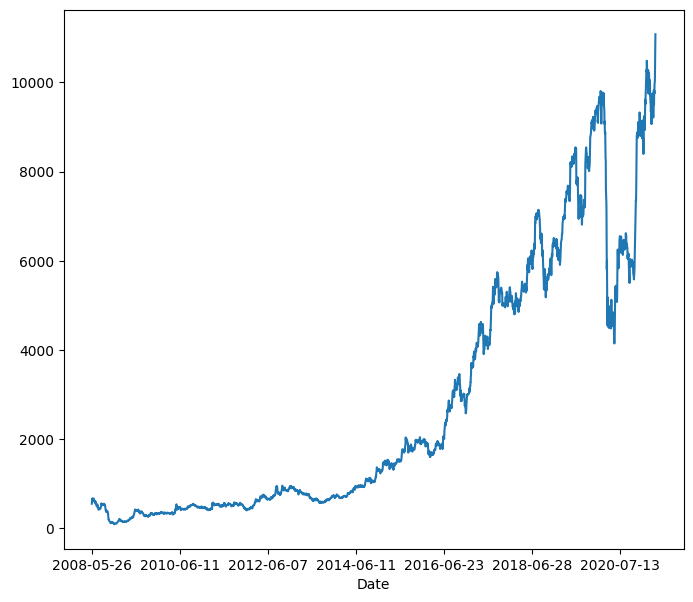

In [50]:
dataframe['VWAP'].plot(figsize=(8,7))

<Axes: xlabel='VWAP', ylabel='Count'>

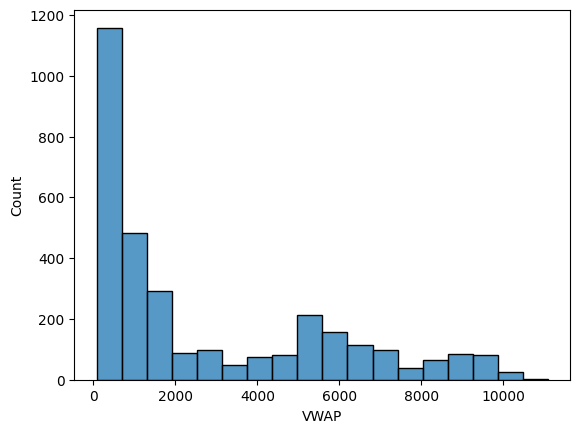

In [54]:
sns.histplot(data=dataframe,x='VWAP')

<Axes: xlabel='VWAP', ylabel='Density'>

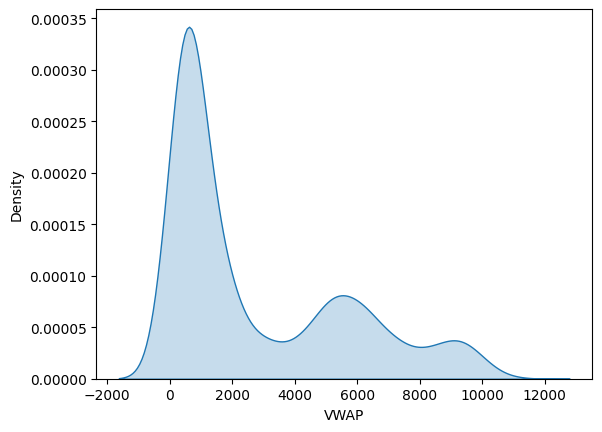

In [56]:
sns.kdeplot(data=dataframe,x='VWAP',fill=True)